# Predict the flower class!

In this notebook we will try to predict the flower class by applying a logistic regression model to it.

## Steps:

1. Import the dataset into a Pandas dataframe. 
Use the column names `sepal_length`, `sepal_width`, `petal_length`, `petal_width` and `class` when you read in the data.
2. Explore the data
3. Substitute missing values with the column mean. Check/remove duplicates. Correct possible spelling errors.
4. Bring all columns to centimeter length. Before, transform any column to numeric if necessary.
5. Check for outliers with `.describe()` or means of plotting.
6. Plot a correlation matrix with a heatmap between the numeric features.
7. Model the relationship between our features (the four numeric flower metrics) and the label (`class`) with **Logistic Regression** using `LogisticRegression()` from the `sklearn.linear_model` module. For the purpose of model validation, use the known train-test-split method with a size parameter of 0.3. Calculate the predicted labels, the **accuracy score** of `y_test` and `y_predicted` and plot a confusion matrix of the two.
8. BONUS: Use all the rows of your data and your trained model to predict the flower classes. Then create pairwise scatterplots between all four features (6 in total) in which you color the dots depending which predicted flower class they belong to. Try to make out distinct clusters in those plots.

## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
                    

In [2]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("iris_dirty.csv")
data.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,2 mm,Iris-setosa
1,4.7,3.2,1.3,2 mm,Iris-setosa
2,4.6,3.1,1.5,2 mm,Iris-setosa
3,5.0,3.6,1.4,2 mm,Iris-setosa
4,5.4,3.9,1.7,4 mm,Iris-setosa


## EDA and Cleaning

In [5]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width      object
class            object
dtype: object

In [6]:
#We find out why petal width is not a float64 
data['petal_width'].value_counts()

2 mm     27
13 mm    13
18 mm    12
15 mm    12
14 mm     9
23 mm     8
10 mm     7
3 mm      7
4 mm      7
20 mm     6
21 mm     6
1 mm      6
12 mm     5
19 mm     5
16 mm     4
24 mm     3
25 mm     3
11 mm     3
22 mm     3
17 mm     2
5 mm      1
6 mm      1
Name: petal_width, dtype: int64

In [7]:
#let's remove that mm to turn the data into a float, and convert to cm 
data['petal_width'] = [float(x.replace("mm",""))/10 for x in data['petal_width']  ]
data['petal_width'] = data['petal_width'].astype(float)

In [8]:
#Now the types are right, let's look at nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#we can also check for zeroes, it is very unlikely that a petal measures 0 mm, and if so, there must be an input error. 
(data == 0).sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [10]:
#checking the unique labels we can see one of them has been misspelled.
data['class'].value_counts()

Iris-versicolor    51
Iris-virginica     50
Iris-setosa        48
Iris-setsoa         1
Name: class, dtype: int64

In [11]:
#we can correct it with:
data['class']=['Iris-setosa'if wrd=='Iris-setsoa'else wrd for wrd in data['class']]
#and check it worked:
data['class'].value_counts()

Iris-versicolor    51
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64

In [12]:
#seeing earlier that one of the sepal_width had a null value, we will explore that line of data
data[data['sepal_width'].isna()]

,sepal_length,sepal_width,petal_length,petal_width,class
81,5.8,NaN,3.9,1.2,Iris-versicolor


In [13]:
#we have only one, and as it belongs to the iris-versicolor, we will replace it by the mean of that column in tha category
mean = data[data['class']=='Iris-versicolor']['sepal_width'].mean()
data['sepal_width'].fillna(mean,inplace = True)
data.info()
#and we got all nulls added. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
#We can see we have some duplicates
data[data.duplicated(keep = False) == True]

,sepal_length,sepal_width,petal_length,petal_width,class
8,4.9,3.1,1.5,0.1,Iris-setosa
33,4.9,3.1,1.5,0.1,Iris-setosa
36,4.9,3.1,1.5,0.1,Iris-setosa
49,7.0,3.2,4.7,1.4,Iris-versicolor
99,7.0,3.2,4.7,1.4,Iris-versicolor


In [15]:
#let's then drop them 
data.drop_duplicates(inplace = True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   class         147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [17]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


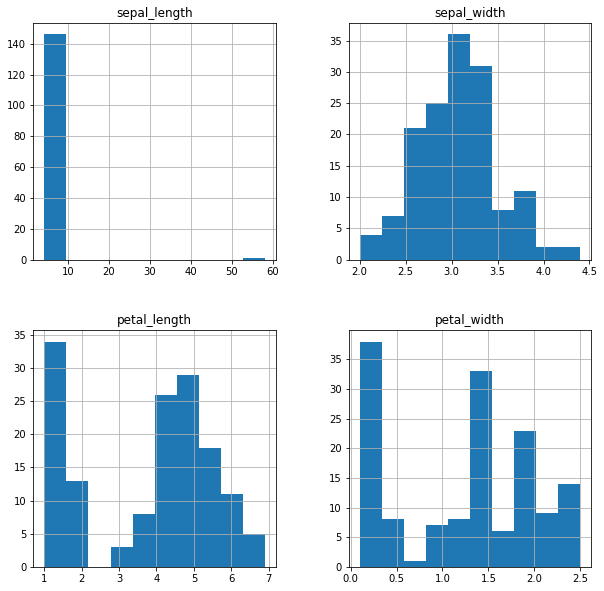

In [18]:
data.hist(figsize = (10,10));


In [19]:
#There is one too very big sepal_length that is very likely to be an outlier, we'll change that value for the mean of the column
data[data['sepal_length']>50]

,sepal_length,sepal_width,petal_length,petal_width,class
142,58.0,2.7,5.1,1.9,Iris-virginica


In [20]:
#So let's also calculate the mean of the category, and use it to substitute it 
mean = data[data['class']=='Iris-virginica']['sepal_length'].mean()
data['sepal_length'] =  [mean if x>50 else x for x in data['sepal_length']]

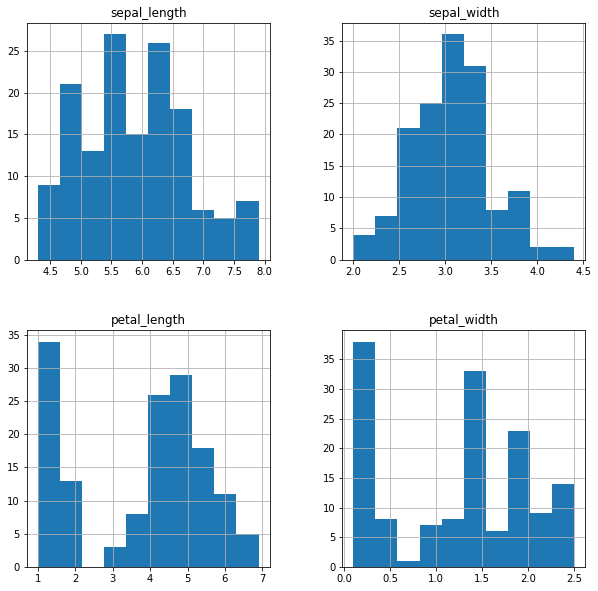

In [21]:
data.hist(figsize = (10,10));

#Now the distributions look more normal 

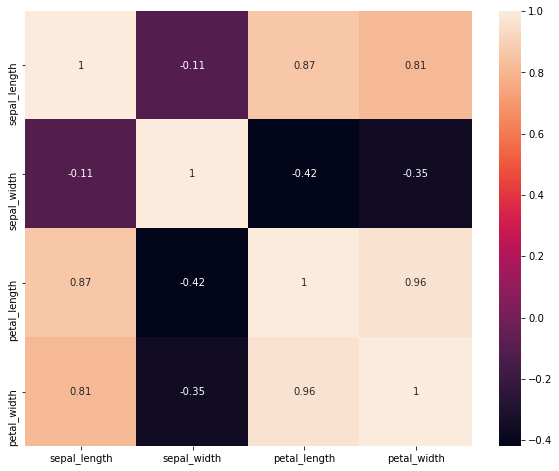

In [22]:
#We plot a correlation heatmap
correlations_matrix = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix,  annot=True)
plt.show()

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

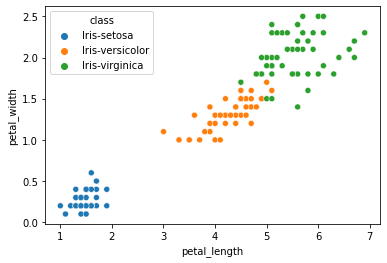

In [23]:
#It is interesting how the correlation of petal length/width is very high. but is not the case with sepals. 
sns.scatterplot(data=data, x="petal_length", y="petal_width", hue="class")

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

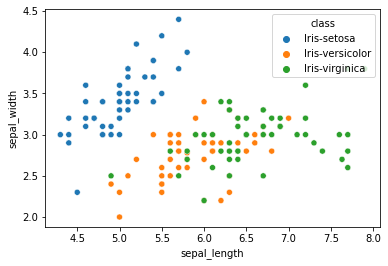

In [24]:
sns.scatterplot(data=data, x="sepal_length", y="sepal_width", hue="class")

## Preprocessing for logistic regression

In [25]:
#Split dependant variable (Class)
y = data['class']
y.shape

(147,)

In [26]:
#Bring the numerical data 
X = data.select_dtypes(include=np.number)
X.shape

(147, 4)

### Split the data

In [27]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.3, random_state=60)

### Apply and train the model

In [28]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=40,
                  multi_class='ovr').fit(X_train, y_train)

In [29]:
predictions = classification.predict(X_test)

In [30]:
predictions

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

In [31]:
accuracy_score(y_test, predictions)

0.9777777777777777

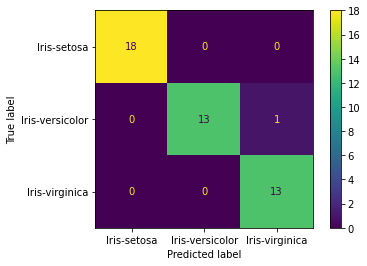

In [32]:
from sklearn.metrics import plot_confusion_matrix
accuracy_score (y_test,predictions)
confusion_matrix (y_test,predictions)
plot_confusion_matrix (classification, X_test, y_test)
plt.show()

## Bonus round: predict the labels with the trained model 

In [33]:
X_test = data.drop(['class'],axis =1)
y_test = data['class']

In [34]:
predictions = classification.predict(X_test)

In [35]:
accuracy_score(y_test, predictions)

0.9455782312925171

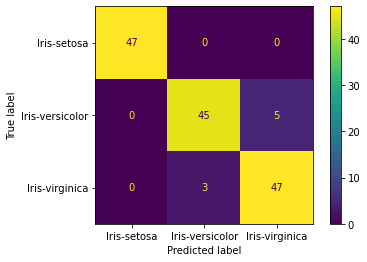

In [36]:
accuracy_score (y_test,predictions)
confusion_matrix (y_test,predictions)
plot_confusion_matrix (classification, X_test, y_test)
plt.show()

The model will predict with 94.5% accuracy the iris flowers of the dataset. We can find in all the scatterplots but sepallength vs sepal width, how the model has very defined areas in which it classifies the flowers:

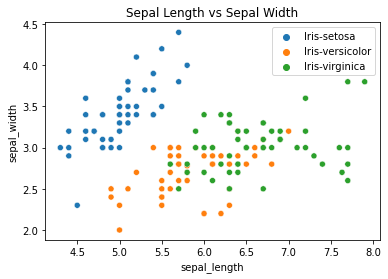

In [37]:
sns.scatterplot (data=data, x='sepal_length',y='sepal_width',hue = predictions)
plt.title("Sepal Length vs Sepal Width");

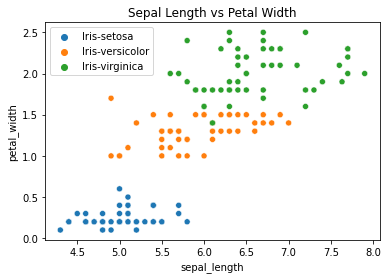

In [38]:
sns.scatterplot (data=data, x='sepal_length',y='petal_width',hue = predictions)
plt.title("Sepal Length vs Petal Width");

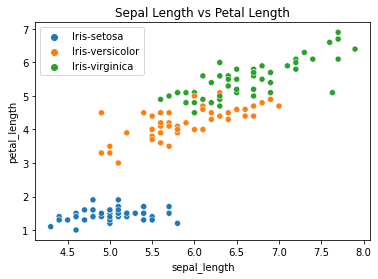

In [39]:
sns.scatterplot (data=data, x='sepal_length',y='petal_length',hue = predictions)
plt.title("Sepal Length vs Petal Length");

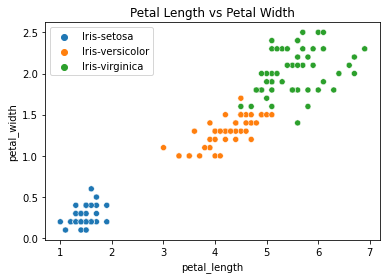

In [40]:
sns.scatterplot (data=data, x='petal_length',y='petal_width',hue = predictions)
plt.title("Petal Length vs Petal Width");

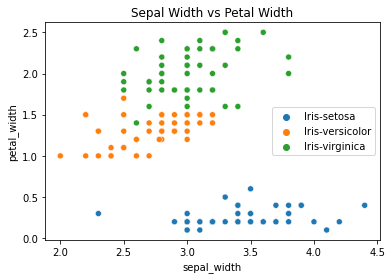

In [41]:
sns.scatterplot (data=data, x='sepal_width',y='petal_width',hue = predictions)
plt.title("Sepal Width vs Petal Width");

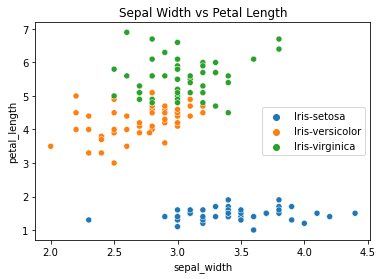

In [42]:
sns.scatterplot (data=data, x='sepal_width',y='petal_length',hue = predictions)
plt.title("Sepal Width vs Petal Length");